# [Airbnb New User Bookings](https://www.kaggle.com/c/airbnb-recruiting-new-user-bookings/data)



In [32]:
import pandas as pd

# Exploring the Users Data

Features of Users Data:
* id: user id
* date_account_created: the date of account creation
* timestamp_first_active: timestamp of the first activity, note that it can be earlier than date_account_created or date_first_booking because a user * can search before signing up
* date_first_booking: date of first booking
* gender
* age
* signup_method
* signup_flow: the page a user came to signup up from
* language: international language preference
* affiliate_channel: what kind of paid marketing
* affiliate_provider: where the marketing is e.g. google, craigslist, other
first_affiliate_tracked: whats the first marketing the user interacted * with before the signing up
* signup_app
* first_device_type
* first_browser
* country_destination: this is the target variable you are to predict

In [33]:
users = pd.read_csv('train_users_2.csv')
users.head()

id date_account_created  timestamp_first_active date_first_booking  \
0  gxn3p5htnn           2010-06-28          20090319043255                NaN   
1  820tgsjxq7           2011-05-25          20090523174809                NaN   
2  4ft3gnwmtx           2010-09-28          20090609231247         2010-08-02   
3  bjjt8pjhuk           2011-12-05          20091031060129         2012-09-08   
4  87mebub9p4           2010-09-14          20091208061105         2010-02-18   

      gender   age signup_method  signup_flow language affiliate_channel  \
0  -unknown-   NaN      facebook            0       en            direct   
1       MALE  38.0      facebook            0       en               seo   
2     FEMALE  56.0         basic            3       en            direct   
3     FEMALE  42.0      facebook            0       en            direct   
4  -unknown-  41.0         basic            0       en            direct   

  affiliate_provider first_affiliate_tracked signup_app first_device_type  \
0             direct               untracked        Web       Mac Desktop   
1             google               untracked        Web       Mac Desktop   
2             direct               untracked        Web   Windows Desktop   
3             direct               untracked        Web       Mac Desktop   
4             direct               untracked        Web       Mac Desktop   

  first_browser country_destination  
0        Chrome                 NDF  
1        Chrome                 NDF  
2            IE                  US  
3       Firefox               other  
4        Chrome                  US

In [34]:
print('Number of unique Airbnb users: ', users.id.nunique())

Number of unique Airbnb users:  213451


#### Cleaning DateTimes
When exploring the users DataFrame, we see that the dates and times are not standardized. The cell below converts all dates and times to pandas DateTime format.

In [36]:
# Cleaning timestamp_first_active column
def convert_to_iso(date_col):
    """
    Convert an array of date, originally in format YYYYMMDDHHmmss,  
    to ISO 8601 format (https://en.wikipedia.org/wiki/ISO_8601)
    
    Input: an array of DateTimes in YYYYMMDDHHMMSS format
    Output: an array of DateTimes in ISO 8601 format
    """
    date_col = date_col.astype(str)
    
    # year = YYYY
    year = date_col.str[0:4]
    # month = MM
    month = date_col.str[4:6]
    # day = DD
    day = date_col.str[6:8]
    # hour = HH
    hour = date_col.str[8:10]
    # minutes = mm
    minute = date_col.str[10:12]
    # seconds = ss
    second = date_col.str[12:14]
    
    date_iso8601 = pd.to_datetime(year + '-' + month + '-' + day + 'T' + hour + ':'+ minute + ':' + second)
    
    return date_iso8601

users.timestamp_first_active = convert_to_iso(users.timestamp_first_active)
users.date_account_created = pd.to_datetime(users.date_account_created) # Converting strings to DateTimes
users.date_first_booking = pd.to_datetime(users.date_first_booking)     # Converting strings to DateTimes
users.head()

id date_account_created timestamp_first_active date_first_booking  \
0  gxn3p5htnn           2010-06-28    2009-03-19 04:32:55                NaT   
1  820tgsjxq7           2011-05-25    2009-05-23 17:48:09                NaT   
2  4ft3gnwmtx           2010-09-28    2009-06-09 23:12:47         2010-08-02   
3  bjjt8pjhuk           2011-12-05    2009-10-31 06:01:29         2012-09-08   
4  87mebub9p4           2010-09-14    2009-12-08 06:11:05         2010-02-18   

      gender   age signup_method  signup_flow language affiliate_channel  \
0  -unknown-   NaN      facebook            0       en            direct   
1       MALE  38.0      facebook            0       en               seo   
2     FEMALE  56.0         basic            3       en            direct   
3     FEMALE  42.0      facebook            0       en            direct   
4  -unknown-  41.0         basic            0       en            direct   

  affiliate_provider first_affiliate_tracked signup_app first_device_type  \
0             direct               untracked        Web       Mac Desktop   
1             google               untracked        Web       Mac Desktop   
2             direct               untracked        Web   Windows Desktop   
3             direct               untracked        Web       Mac Desktop   
4             direct               untracked        Web       Mac Desktop   

  first_browser country_destination  
0        Chrome                 NDF  
1        Chrome                 NDF  
2            IE                  US  
3       Firefox               other  
4        Chrome                  US

In [35]:
# ALTERNATIVE TO CONVERT_TO_ISO: http://strftime.org/
# users.timestamp_first_active = pd.to_datetime(users.timestamp_first_active, format='%Y%m%d%H%M%S')

Now we see that all dates and times are in DateTime format.

In [37]:
print(users[['timestamp_first_active']].describe())
print('')
print(users[['date_account_created']].describe())
print('')
print(users[['date_first_booking']].describe())

       timestamp_first_active
count                  213451
unique                 213451
top       2013-07-01 05:26:34
freq                        1
first     2009-03-19 04:32:55
last      2014-06-30 23:58:24

       date_account_created
count                213451
unique                 1634
top     2014-05-13 00:00:00
freq                    674
first   2010-01-01 00:00:00
last    2014-06-30 00:00:00

         date_first_booking
count                 88908
unique                 1976
top     2014-05-22 00:00:00
freq                    248
first   2010-01-02 00:00:00
last    2015-06-29 00:00:00


### Gender

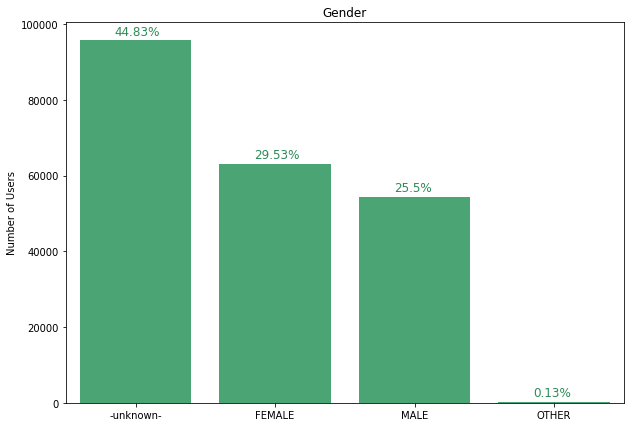

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

y = users.gender.value_counts()
x = list(y.index)

plt.figure(figsize=(10,7))
ax = sns.barplot(x=x, y=y, color='mediumseagreen')
ax.set_alpha(0.8)
ax.set_title('Gender')
ax.set_ylabel('Number of Users')

# ---------- CODE TO ADD PERCENTAGE LABELS --------------------------------
# create a list to collect plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar labels using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.25, i.get_height()+1500, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=12,
                color='seagreen')
# --------------------------------------------------------------------------

plt.show()

### Age

According to [Airbnb Policy](https://www.airbnb.com/help/article/433/can-children-travel-on-airbnb):

"**You must be 18 or older to create an account**. In order to use the Airbnb site and services, you must be 18 years or older. It's against our Terms of Service to create an account to travel or host unless you're at least 18 years old."


In [39]:
too_young = users.loc[users.age < 18]['age']
print('-----------Ages below 18-----------')
print('Age     Count')
print(too_young.value_counts())

print('')

too_old = users.loc[users.age > 100]['age']
print('-----------Ages above 100-----------')
print('Age       Count')
print(too_old.value_counts())

-----------Ages below 18-----------
Age     Count
17.0    67
5.0     45
16.0    26
15.0     8
2.0      7
4.0      3
1.0      2
Name: age, dtype: int64

-----------Ages above 100-----------
Age       Count
105.0     1131
2014.0     710
110.0      196
104.0       48
2013.0      39
102.0       34
109.0       31
103.0       26
101.0       23
107.0       23
106.0       17
108.0       15
115.0       13
113.0        4
1949.0       3
1931.0       3
1932.0       3
1928.0       2
1936.0       2
1929.0       2
1924.0       2
1947.0       2
111.0        2
1942.0       1
1926.0       1
1933.0       1
112.0        1
132.0        1
1952.0       1
1953.0       1
1935.0       1
1938.0       1
1925.0       1
1995.0       1
150.0        1
2008.0       1
1927.0       1
Name: age, dtype: int64


One option for super young users is to delete their whole rows, or convert them to 18. If age is an important factor in the model, then having a NaN value will not help. If any of your input data is NaN the model might predict NaN. Recommended approach is to throw them out given that they are less than 1% of data. 

In [40]:
birth_years = users.loc[(users.age > 200) & (users.age < 1993)]['age'].unique()
print(birth_years)

[1949. 1931. 1932. 1928. 1936. 1933. 1935. 1925. 1952. 1927. 1953. 1942.
 1924. 1929. 1947. 1938. 1926.]


Recommendation: since the number of rows is so small for the rows that you think might be birth years, the simplified method is to first throw out rows with bad data. As long as you're not throwing out half your data this might be a fine approach.  
You can even throw out the 105 age category rows. These don't amount to even 0.1% of the data.

In [41]:
users = users.loc[(users.age > 18) & (users.age < 100), :] # This will also throw out any NaNs
users.head()

id date_account_created timestamp_first_active date_first_booking  \
1  820tgsjxq7           2011-05-25    2009-05-23 17:48:09                NaT   
2  4ft3gnwmtx           2010-09-28    2009-06-09 23:12:47         2010-08-02   
3  bjjt8pjhuk           2011-12-05    2009-10-31 06:01:29         2012-09-08   
4  87mebub9p4           2010-09-14    2009-12-08 06:11:05         2010-02-18   
6  lsw9q7uk0j           2010-01-02    2010-01-02 01:25:58         2010-01-05   

      gender   age signup_method  signup_flow language affiliate_channel  \
1       MALE  38.0      facebook            0       en               seo   
2     FEMALE  56.0         basic            3       en            direct   
3     FEMALE  42.0      facebook            0       en            direct   
4  -unknown-  41.0         basic            0       en            direct   
6     FEMALE  46.0         basic            0       en             other   

  affiliate_provider first_affiliate_tracked signup_app first_device_type  \
1             google               untracked        Web       Mac Desktop   
2             direct               untracked        Web   Windows Desktop   
3             direct               untracked        Web       Mac Desktop   
4             direct               untracked        Web       Mac Desktop   
6         craigslist               untracked        Web       Mac Desktop   

  first_browser country_destination  
1        Chrome                 NDF  
2            IE                  US  
3       Firefox               other  
4        Chrome                  US  
6        Safari                  US

### Signup Methods

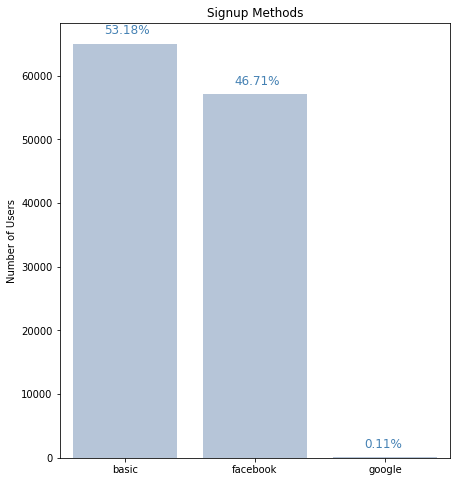

In [42]:
y = users.signup_method.value_counts()
x = list(y.index)

plt.figure(figsize=(7,8))
ax = sns.barplot(x=x, y=y, color='lightsteelblue')
ax.set_alpha(0.8)
ax.set_title('Signup Methods')
ax.set_ylabel('Number of Users')

# create a list to collect plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar labels using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.24, i.get_height()+1500, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=12,
                color='steelblue')

plt.show()

### Languages

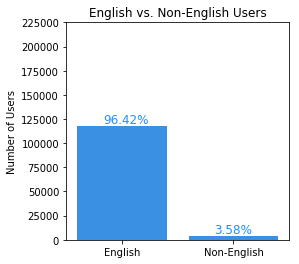

In [43]:
all_languages = users.language.value_counts()
english = all_languages[0]
non_english = all_languages[1:25].sum()
y = [english, non_english]
x = ['English', 'Non-English']


plt.figure(figsize=(4,4))
ax = sns.barplot(x=x, y=y, color='dodgerblue')
ax.set_alpha(0.8)
ax.set_title('English vs. Non-English Users')
ax.set_ylabel('Number of Users')
ax.set_yticks(range(0,250000,25000))

# create a list to collect plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar labels using above list
total = sum(totals)

# set individual bar labels using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.23, i.get_height()+3000, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=12,
                color='dodgerblue')

plt.show()

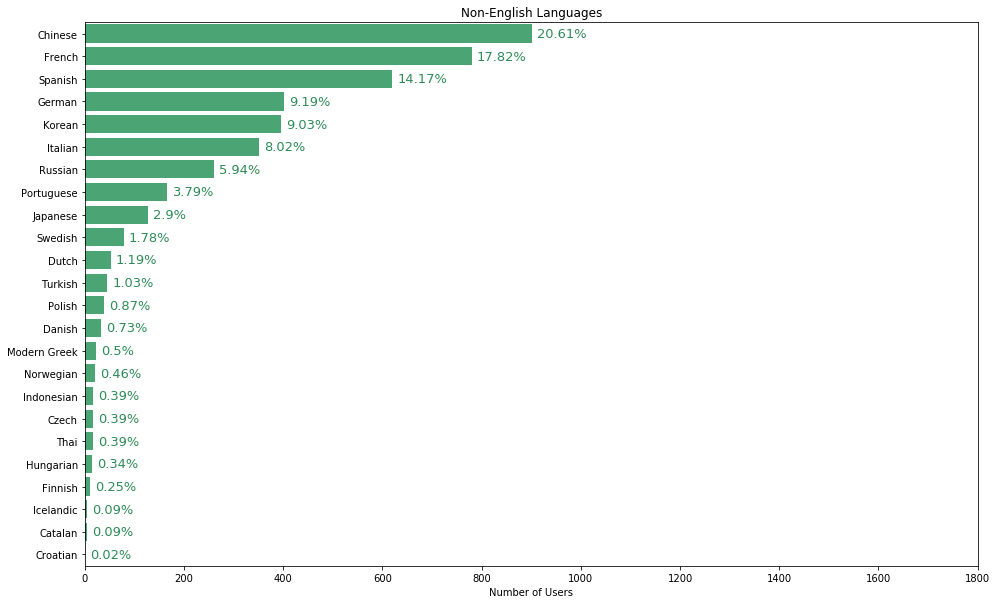

In [44]:
# Dictionary with Language codes and Names
iso_639 = dict([('ab', 'Abkhaz'),('aa', 'Afar'),('af', 'Afrikaans'),('ak', 'Akan'),('sq', 'Albanian'),('am', 'Amharic'),('ar', 'Arabic'),('an', 'Aragonese'),('hy', 'Armenian'),('as', 'Assamese'),('av', 'Avaric'),('ae', 'Avestan'),('ay', 'Aymara'),('az', 'Azerbaijani'),('bm', 'Bambara'),('ba', 'Bashkir'),('eu', 'Basque'),('be', 'Belarusian'),('bn', 'Bengali'),('bh', 'Bihari'),('bi', 'Bislama'),('bs', 'Bosnian'),('br', 'Breton'),('bg', 'Bulgarian'),('my', 'Burmese'),('ca', 'Catalan'),('ch', 'Chamorro'),('ce', 'Chechen'),('ny', 'Chichewa; Chewa; Nyanja'),('zh', 'Chinese'),('cv', 'Chuvash'),('kw', 'Cornish'),('co', 'Corsican'),('cr', 'Cree'),('hr', 'Croatian'),('cs', 'Czech'),('da', 'Danish'),('dv', 'Divehi; Maldivian;'),('nl', 'Dutch'),('dz', 'Dzongkha'),('en', 'English'),('eo', 'Esperanto'),('et', 'Estonian'),('ee', 'Ewe'),('fo', 'Faroese'),('fj', 'Fijian'),('fi', 'Finnish'),('fr', 'French'),('ff', 'Fula'),('gl', 'Galician'),('ka', 'Georgian'),('de', 'German'),('el', 'Modern Greek'),('gn', 'Guaraní'),('gu', 'Gujarati'),('ht', 'Haitian'),('ha', 'Hausa'),('he', 'Hebrew (modern)'),('hz', 'Herero'),('hi', 'Hindi'),('ho', 'Hiri Motu'),('hu', 'Hungarian'),('ia', 'Interlingua'),('id', 'Indonesian'),('ie', 'Interlingue'),('ga', 'Irish'),('ig', 'Igbo'),('ik', 'Inupiaq'),('io', 'Ido'),('is', 'Icelandic'),('it', 'Italian'),('iu', 'Inuktitut'),('ja', 'Japanese'),('jv', 'Javanese'),('kl', 'Kalaallisut'),('kn', 'Kannada'),('kr', 'Kanuri'),('ks', 'Kashmiri'),('kk', 'Kazakh'),('km', 'Khmer'),('ki', 'Kikuyu, Gikuyu'),('rw', 'Kinyarwanda'),('ky', 'Kirghiz, Kyrgyz'),('kv', 'Komi'),('kg', 'Kongo'),('ko', 'Korean'),('ku', 'Kurdish'),('kj', 'Kwanyama, Kuanyama'),('la', 'Latin'),('lb', 'Luxembourgish'),('lg', 'Luganda'),('li', 'Limburgish'),('ln', 'Lingala'),('lo', 'Lao'),('lt', 'Lithuanian'),('lu', 'Luba-Katanga'),('lv', 'Latvian'),('gv', 'Manx'),('mk', 'Macedonian'),('mg', 'Malagasy'),('ms', 'Malay'),('ml', 'Malayalam'),('mt', 'Maltese'),('mi', 'Māori'),('mr', 'Marathi (Marāṭhī)'),('mh', 'Marshallese'),('mn', 'Mongolian'),('na', 'Nauru'),('nv', 'Navajo, Navaho'),('nb', 'Norwegian Bokmål'),('nd', 'North Ndebele'),('ne', 'Nepali'),('ng', 'Ndonga'),('nn', 'Norwegian Nynorsk'),('no', 'Norwegian'),('ii', 'Nuosu'),('nr', 'South Ndebele'),('oc', 'Occitan'),('oj', 'Ojibwe, Ojibwa'),('cu', 'Old Church Slavonic'),('om', 'Oromo'),('or', 'Oriya'),('os', 'Ossetian, Ossetic'),('pa', 'Panjabi, Punjabi'),('pi', 'Pāli'),('fa', 'Persian'),('pl', 'Polish'),('ps', 'Pashto, Pushto'),('pt', 'Portuguese'),('qu', 'Quechua'),('rm', 'Romansh'),('rn', 'Kirundi'),('ro', 'Romanian, Moldavan'),('ru', 'Russian'),('sa', 'Sanskrit (Saṁskṛta)'),('sc', 'Sardinian'),('sd', 'Sindhi'),('se', 'Northern Sami'),('sm', 'Samoan'),('sg', 'Sango'),('sr', 'Serbian'),('gd', 'Scottish Gaelic'),('sn', 'Shona'),('si', 'Sinhala, Sinhalese'),('sk', 'Slovak'),('sl', 'Slovene'),('so', 'Somali'),('st', 'Southern Sotho'),('es', 'Spanish'),('su', 'Sundanese'),('sw', 'Swahili'),('ss', 'Swati'),('sv', 'Swedish'),('ta', 'Tamil'),('te', 'Telugu'),('tg', 'Tajik'),('th', 'Thai'),('ti', 'Tigrinya'),('bo', 'Tibetan'),('tk', 'Turkmen'),('tl', 'Tagalog'),('tn', 'Tswana'),('to', 'Tonga'),('tr', 'Turkish'),('ts', 'Tsonga'),('tt', 'Tatar'),('tw', 'Twi'),('ty', 'Tahitian'),('ug', 'Uighur, Uyghur'),('uk', 'Ukrainian'),('ur', 'Urdu'),('uz', 'Uzbek'),('ve', 'Venda'),('vi', 'Vietnamese'),('vo', 'Volapük'),('wa', 'Walloon'),('cy', 'Welsh'),('wo', 'Wolof'),('fy', 'Western Frisian'),('xh', 'Xhosa'),('yi', 'Yiddish'),('yo', 'Yoruba'),('za', 'Zhuang, Chuang'),('zu', 'Zulu'),])

non_english_codes = list(all_languages[1:25].index)
non_english_languages = [iso_639.get(code, 'Name') for code in non_english_codes]
non_english_counts = all_languages[1:25]

x = non_english_counts
y = non_english_languages

plt.figure(figsize=(16,10))
ax = sns.barplot(x=x, y=y, color='mediumseagreen')
ax.set_alpha(0.8)
ax.set_title('Non-English Languages')
ax.set_xlabel('Number of Users')
ax.set_xticks(range(0,2000,200))

# create a list to collect plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+10, i.get_y()+.55, \
            str(round((i.get_width()/total)*100, 2))+'%', fontsize=13,
            color='seagreen')

plt.show()

### Affiliate Channels

Affiliate Channels refer to the type of paid marketing.

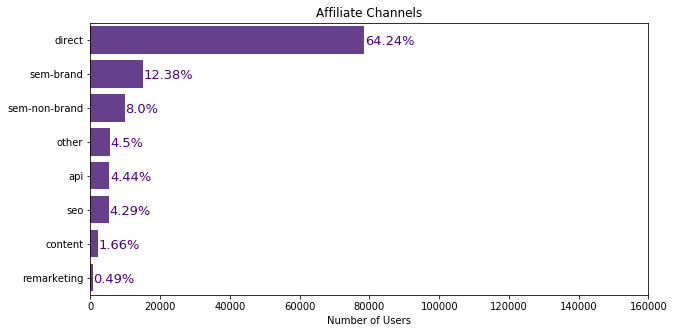

In [45]:
x = users.affiliate_channel.value_counts()
y = list(x.index)

plt.figure(figsize=(10,5))
ax = sns.barplot(x=x, y=y, color='rebeccapurple')
ax.set_alpha(0.8)
ax.set_title('Affiliate Channels')
ax.set_xlabel('Number of Users')
ax.set_xticks(range(0,165000,20000))

# create a list to collect plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+200, i.get_y()+.55, \
            str(round((i.get_width()/total)*100, 2))+'%', fontsize=13,
            color='indigo')

plt.show()

### Affiliate Providers
Where the marketing is e.g. google, craigslist, other.

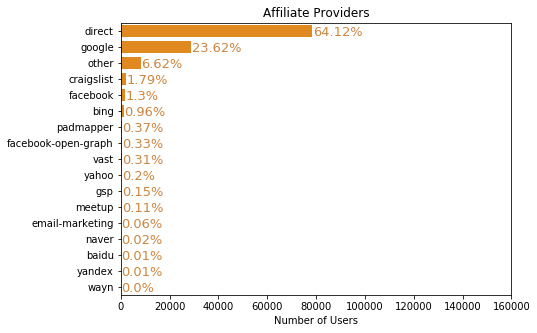

In [46]:
x = users.affiliate_provider.value_counts()
y = list(x.index)

plt.figure(figsize=(7,5))
ax = sns.barplot(x=x, y=y, color='darkorange')
ax.set_alpha(0.8)
ax.set_title('Affiliate Providers')
ax.set_xlabel('Number of Users')
ax.set_xticks(range(0,165000,20000))

# create a list to collect plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+200, i.get_y()+.7, \
            str(round((i.get_width()/total)*100, 2))+'%', fontsize=13,
            color='peru')

plt.show()

### First Affiliate Tracked
The first marketing the user interacted with before the signing up.
Plot below does not include users for which first_affiliate_tracked is NaN.

First Affiliate Tracked, Types:  ['untracked' 'omg' 'linked' nan 'tracked-other' 'product' 'marketing'
 'local ops']


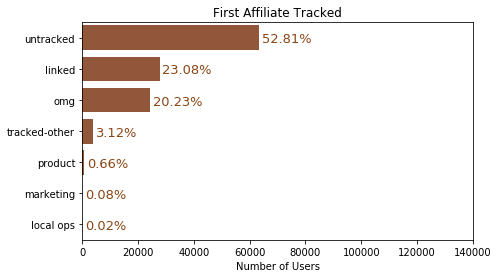

In [47]:
print('First Affiliate Tracked, Types: ', users.first_affiliate_tracked.unique())

x = users.first_affiliate_tracked.value_counts()
y = list(x.index)

plt.figure(figsize=(7,4))
ax = sns.barplot(x=x, y=y, color='sienna')
ax.set_alpha(0.8)
ax.set_title('First Affiliate Tracked')
ax.set_xlabel('Number of Users')
ax.set_xticks(range(0,150000,20000))

# create a list to collect plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+1000, i.get_y()+.55, \
            str(round((i.get_width()/total)*100, 2))+'%', fontsize=13,
            color='saddlebrown')

plt.show()

### Signup Apps

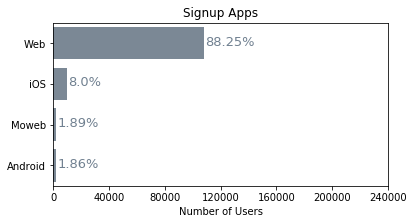

In [48]:
x = users.signup_app.value_counts()
y = list(x.index)

plt.figure(figsize=(6,3))
ax = sns.barplot(x=x, y=y, color='lightslategrey')
ax.set_alpha(0.8)
ax.set_title('Signup Apps')
ax.set_xlabel('Number of Users')
ax.set_xticks(range(0,250000,40000))

# create a list to collect plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+1000, i.get_y()+.45, \
            str(round((i.get_width()/total)*100, 2))+'%', fontsize=13,
            color='slategrey')

plt.show()

### First Device Type

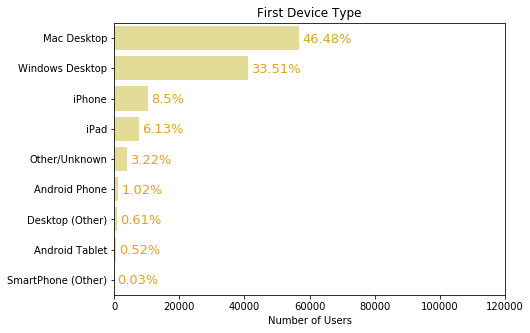

In [49]:
x = users.first_device_type.value_counts()
y = list(x.index)

plt.figure(figsize=(7,5))
ax = sns.barplot(x=x, y=y, color='khaki')
ax.set_alpha(0.8)
ax.set_title('First Device Type')
ax.set_xlabel('Number of Users')
ax.set_xticks(range(0,140000,20000))

# create a list to collect plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+1000, i.get_y()+.55, \
            str(round((i.get_width()/total)*100, 2))+'%', fontsize=13,
            color='goldenrod')

plt.show()

### First Browser

First Browser:  ['Chrome' 'IE' 'Firefox' 'Safari' '-unknown-' 'Mobile Safari'
 'Chrome Mobile' 'RockMelt' 'Chromium' 'Android Browser' 'AOL Explorer'
 'Opera' 'TenFourFox' 'Apple Mail' 'Silk' 'Camino' 'IE Mobile'
 'BlackBerry Browser' 'SeaMonkey' 'Mobile Firefox' 'Sogou Explorer'
 'IceWeasel' 'SiteKiosk' 'Opera Mini' 'Maxthon' 'Kindle Browser'
 'CoolNovo' 'wOSBrowser' 'Iron' 'Mozilla' 'PS Vita browser' 'NetNewsWire'
 'Pale Moon' 'Avant Browser' 'Opera Mobile' 'Yandex.Browser' 'CometBird'
 'TheWorld Browser' 'SlimBrowser' 'Comodo Dragon' 'Stainless']



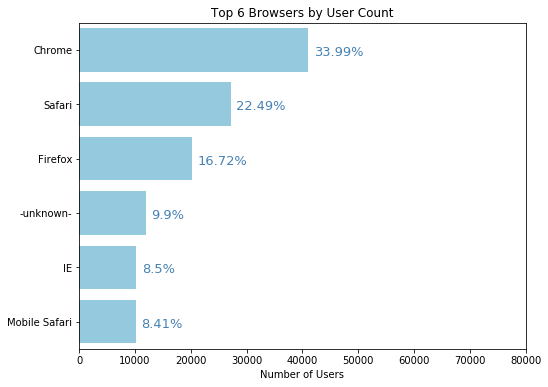

In [50]:
print('First Browser: ', users.first_browser.unique())
print('')

x = users.first_browser.value_counts()[0:6]
y = list(x.index)

plt.figure(figsize=(8,6))
ax = sns.barplot(x=x, y=y, color='skyblue')
ax.set_alpha(0.8)
ax.set_title('Top 6 Browsers by User Count')
ax.set_xlabel('Number of Users')
ax.set_xticks(range(0,90000,10000))

# create a list to collect plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+1000, i.get_y()+.5, \
            str(round((i.get_width()/total)*100, 2))+'%', fontsize=13,
            color='steelblue')

plt.show()

### Country Destinations

Target Variable to predict: Country Destinations

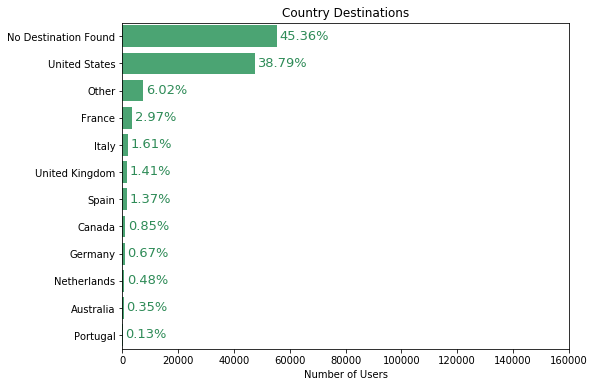

In [51]:
# First install pycountry package in terminal with the following line of code:
# pip install pycountry

import pycountry
countries = {}
for country in pycountry.countries:
    countries[country.alpha_2] = country.name

# non_english_codes = list(all_languages[1:25].index)
# non_english_languages = [countries.get(code, 'Name') for code in non_english_codes]

x = users.country_destination.value_counts()
country_codes = list(x.index)
y = []
for code in country_codes:
    if code == 'other':
        y.append('Other')
    elif code == 'NDF': #no destination found
        y.append('No Destination Found')
    else:
        country_name = countries.get(code)
        y.append(country_name)

plt.figure(figsize=(8,6))
ax = sns.barplot(x=x, y=y, color='mediumseagreen')
ax.set_alpha(0.8)
ax.set_title('Country Destinations')
ax.set_xlabel('Number of Users')
ax.set_xticks(range(0,170000,20000))

# create a list to collect plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+1000, i.get_y()+.5, \
            str(round((i.get_width()/total)*100, 2))+'%', fontsize=13,
            color='seagreen')

plt.show()

Two-steps Machine Learning model:

(1) Split the data into no booking (NDF) and booking (destination found)

(2) Based on DF data, predict which country specifically

Research Oversampling (duplicating data), Undersampling (getting rid of data), Class Imbalance Techniques. 

# Exploring the Sessions Data

sessions.csv - web sessions log for users
* user_id: to be joined with the column 'id' in users table
* action
* action_type
* action_detail
* device_type
* secs_elapsed

In [52]:
sessions = pd.read_csv('sessions.csv')
print('Number of Sessions: ', sessions.shape[0]) # number of rows
sessions.head()

Number of Sessions:  10567737


user_id          action action_type        action_detail  \
0  d1mm9tcy42          lookup         NaN                  NaN   
1  d1mm9tcy42  search_results       click  view_search_results   
2  d1mm9tcy42          lookup         NaN                  NaN   
3  d1mm9tcy42  search_results       click  view_search_results   
4  d1mm9tcy42          lookup         NaN                  NaN   

       device_type  secs_elapsed  
0  Windows Desktop         319.0  
1  Windows Desktop       67753.0  
2  Windows Desktop         301.0  
3  Windows Desktop       22141.0  
4  Windows Desktop         435.0

### Unique User IDs

In [53]:
print('Number of Unique IDs: ', sessions.user_id.nunique())

Number of Unique IDs:  135483


### Actions

Number of Possible User Actions:  359
Top 25 Possible User Actions: 
show                     2768278
index                     843699
search_results            725226
personalize               706824
search                    536057
ajax_refresh_subtotal     487744
update                    365130
similar_listings          364624
social_connections        339000
reviews                   320591
active                    188036
similar_listings_v2       168788
lookup                    162041
create                    155887
dashboard                 152952
header_userpic            141830
collections               124417
edit                      109083
campaigns                 105028
track_page_view            81117
unavailabilities           78317
qt2                        64651
notifications              59392
confirm_email              58726
requested                  57034
Name: action, dtype: int64


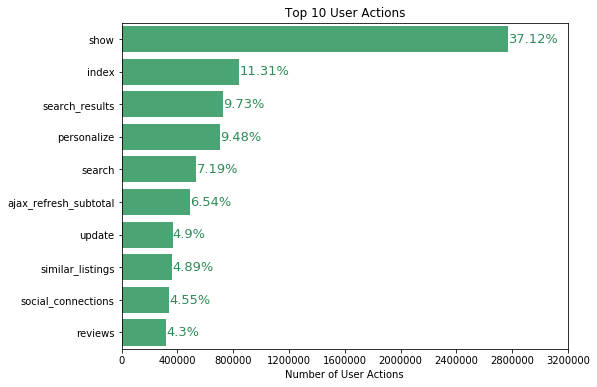

In [54]:
print('Number of Possible User Actions: ', sessions.action.nunique())
user_actions = sessions.action.value_counts()
print('Top 25 Possible User Actions: ')
print(user_actions[0:25])

x = user_actions[0:10]
y = list(x.index)

plt.figure(figsize=(8,6))
ax = sns.barplot(x=x, y=y, color='mediumseagreen')
ax.set_alpha(0.8)
ax.set_title('Top 10 User Actions')
ax.set_xlabel('Number of User Actions')
ax.set_xticks(range(0,3600000,400000))

# create a list to collect plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+1000, i.get_y()+.5, \
            str(round((i.get_width()/total)*100, 2))+'%', fontsize=13,
            color='seagreen')

plt.show()

### Action Type

In [55]:
print('Action Types: ', sessions.action_type.unique())

Action Types:  [nan 'click' 'data' 'view' 'submit' 'message_post' '-unknown-'
 'booking_request' 'partner_callback' 'booking_response' 'modify']


### Action Detail

In [56]:
print('Action Detail: ', sessions.action_detail.unique())

Action Detail:  [nan 'view_search_results' 'wishlist_content_update' 'similar_listings'
 'change_trip_characteristics' 'p3' 'header_userpic' 'contact_host'
 'message_post' '-unknown-' 'dashboard' 'create_user' 'confirm_email_link'
 'user_profile_content_update' 'user_profile' 'pending' 'p5'
 'create_phone_numbers' 'cancellation_policies' 'user_wishlists'
 'change_contact_host_dates' 'wishlist' 'message_thread'
 'request_new_confirm_email' 'send_message' 'your_trips' 'login_page'
 'login' 'login_modal' 'toggle_archived_thread' 'p1'
 'profile_verifications' 'edit_profile' 'oauth_login'
 'post_checkout_action' 'account_notification_settings'
 'update_user_profile' 'oauth_response' 'signup_modal' 'signup_login_page'
 'at_checkpoint' 'manage_listing' 'create_listing' 'your_listings'
 'profile_references' 'list_your_space' 'popular_wishlists'
 'listing_reviews_page' 'apply_coupon' 'user_tax_forms'
 'account_payout_preferences' 'guest_itinerary' 'guest_receipt'
 'account_privacy_settings' 'lo

### Device Type

In [57]:
print('Device Types: ', sessions.device_type.unique())

Device Types:  ['Windows Desktop' '-unknown-' 'Mac Desktop' 'Android Phone' 'iPhone'
 'iPad Tablet' 'Android App Unknown Phone/Tablet' 'Linux Desktop' 'Tablet'
 'Chromebook' 'Blackberry' 'iPodtouch' 'Windows Phone' 'Opera Phone']


### Secs Elapsed

In [58]:
y = sessions[['secs_elapsed']]
print(y.info())
print(y.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10567737 entries, 0 to 10567736
Data columns (total 1 columns):
secs_elapsed    float64
dtypes: float64(1)
memory usage: 80.6 MB
None
       secs_elapsed
count  1.043171e+07
mean   1.940581e+04
std    8.888424e+04
min    0.000000e+00
25%    2.290000e+02
50%    1.147000e+03
75%    8.444000e+03
max    1.799977e+06


# Exploring the Countries Data

countries.csv - summary statistics of destination countries in this dataset and their locations

In [59]:
users.country_destination.unique()

array(['NDF', 'US', 'other', 'CA', 'FR', 'IT', 'ES', 'GB', 'NL', 'DE',
       'AU', 'PT'], dtype=object)

In [60]:
countries = pd.read_csv('countries.csv')
countries

country_destination  lat_destination  lng_destination  distance_km  \
0                  AU       -26.853388       133.275160   15297.7440   
1                  CA        62.393303       -96.818146    2828.1333   
2                  DE        51.165707        10.452764    7879.5680   
3                  ES        39.896027        -2.487694    7730.7240   
4                  FR        46.232193         2.209667    7682.9450   
5                  GB        54.633220        -3.432277    6883.6590   
6                  IT        41.873990        12.564167    8636.6310   
7                  NL        52.133057         5.295250    7524.3203   
8                  PT        39.553444        -7.839319    7355.2534   
9                  US        36.966427       -95.844030       0.0000   

   destination_km2 destination_language   language_levenshtein_distance  
0        7741220.0                   eng                           0.00  
1        9984670.0                   eng                           0.00  
2         357022.0                   deu                          72.61  
3         505370.0                   spa                          92.25  
4         643801.0                   fra                          92.06  
5         243610.0                   eng                           0.00  
6         301340.0                   ita                          89.40  
7          41543.0                   nld                          63.22  
8          92090.0                   por                          95.45  
9        9826675.0                   eng                           0.00

In [61]:
print(countries['destination_language '].unique())

['eng' 'deu' 'spa' 'fra' 'ita' 'nld' 'por']


### Age Gender Brackets
Summary statistics of users' age group, gender, country of destination

In [62]:
age_gender_bkts = pd.read_csv('age_gender_bkts.csv')
print(age_gender_bkts.head())

age_buckets = age_gender_bkts.age_bucket.unique()
print('Age Buckets: ', age_buckets)

genders = age_gender_bkts.gender.unique()
print(genders)

  age_bucket country_destination gender  population_in_thousands    year
0       100+                  AU   male                      1.0  2015.0
1      95-99                  AU   male                      9.0  2015.0
2      90-94                  AU   male                     47.0  2015.0
3      85-89                  AU   male                    118.0  2015.0
4      80-84                  AU   male                    199.0  2015.0
Age Buckets:  ['100+' '95-99' '90-94' '85-89' '80-84' '75-79' '70-74' '65-69' '60-64'
 '55-59' '50-54' '45-49' '40-44' '35-39' '30-34' '25-29' '20-24' '15-19'
 '10-14' '5-9' '0-4']
['male' 'female']
